# Simulating the SSH model

Here we simulate the SSH model using the Pulser backend.
We follow the work of De Léséleuc et al. in ["Observation of a symmetry-protected topological phase of interacting bosons with Rydberg atoms"](https://www.science.org/doi/10.1126/science.aav9105).

In [1]:
import qse
import pulser
import numpy as np
import matplotlib.pyplot as plt

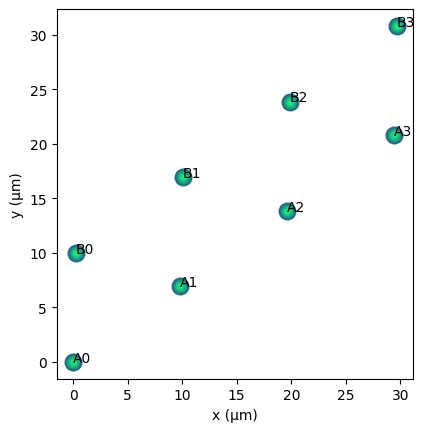

In [11]:
lattice_spacing = 12
repeats = 4

qbits1 = qse.lattices.chain(lattice_spacing=lattice_spacing, repeats=repeats)
qbits1.labels = [f"A{i}" for i in range(repeats)]

qbits2 = qse.lattices.chain(lattice_spacing=lattice_spacing, repeats=repeats)
qbits2.labels = [f"B{i}" for i in range(repeats)]
qbits2.translate((lattice_spacing * 0.5, 8, 0))

qbits_trivial = qbits1 + qbits2
qbits_trivial.rotate(90 - 54.7)

qbits_trivial.draw(show_labels=True, units="µm")

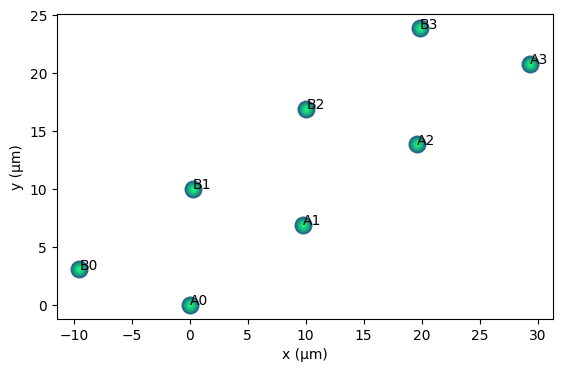

In [13]:
lattice_spacing = 12
repeats = 4

qbits1 = qse.lattices.chain(lattice_spacing=lattice_spacing, repeats=repeats)
qbits1.labels = [f"A{i}" for i in range(repeats)]

qbits2 = qse.lattices.chain(lattice_spacing=lattice_spacing, repeats=repeats)
qbits2.labels = [f"B{i}" for i in range(repeats)]
qbits2.translate((-lattice_spacing * 0.5, 8, 0))

qbits_topological = qbits1 + qbits2
qbits_topological.rotate(90 - 54.7)

qbits_topological.draw(show_labels=True, units="µm")

In [14]:
t_rise = 1200  # ns
t_sweep = 1200  # ns
t_fall = 1200  # ns

# up ramp, constant, downramp waveform
omega_max = 1.8 * 2 * np.pi  # rad/µs

amplitude_afm = pulser.CompositeWaveform(
    pulser.waveforms.RampWaveform(t_rise, 0.0, omega_max),
    pulser.waveforms.ConstantWaveform(t_sweep, omega_max),
    pulser.waveforms.RampWaveform(t_fall, omega_max, 0.0),
)


delta_0 = -4.5 * 2 * np.pi  # rad/µs
delta_f = 3.5 * 2 * np.pi  # rad/µs

# corresponding waveform for detuning
detuning_afm = pulser.CompositeWaveform(
    pulser.waveforms.ConstantWaveform(t_rise, delta_0),
    pulser.waveforms.RampWaveform(t_sweep, delta_0, delta_f),
    pulser.waveforms.ConstantWaveform(t_fall, delta_f),
)

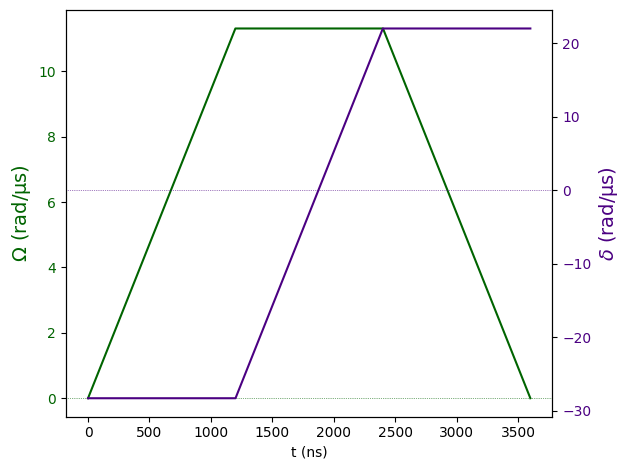

In [15]:
pulser.Pulse(amplitude=amplitude_afm, detuning=detuning_afm, phase=0.0).draw()

In [16]:
pcalc_trivial = qse.calc.Pulser(
    qbits=qbits_trivial,
    amplitude=amplitude_afm,
    detuning=detuning_afm,
    channel="mw_global",
    magnetic_field=np.array(
        [0.0, 1.0, 0.0],
    ),
)
pcalc_trivial.build_sequence()
pcalc_trivial.calculate()

pcalc_topological = qse.calc.Pulser(
    qbits=qbits_topological,
    amplitude=amplitude_afm,
    detuning=detuning_afm,
    channel="mw_global",
    magnetic_field=np.array(
        [0.0, 1.0, 0.0],
    ),
)
pcalc_topological.build_sequence()
pcalc_topological.calculate()

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.04s. Est. time left: 00:00:00:00
50.0%. Run time:   0.05s. Est. time left: 00:00:00:00
60.0%. Run time:   0.06s. Est. time left: 00:00:00:00
70.0%. Run time:   0.06s. Est. time left: 00:00:00:00
80.0%. Run time:   0.07s. Est. time left: 00:00:00:00
90.0%. Run time:   0.08s. Est. time left: 00:00:00:00
100.0%. Run time:   0.10s. Est. time left: 00:00:00:00
Total run time:   0.10s
time in compute and simulation = 0.18240833282470703 s.
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.04s. Est. time left: 00:00:00:00
50.0%. Run time:   0.04s. Est. time left: 00:00:00:00
60.0%. Run time:   0.05s. Est. time left: 00:00:00:00
70.0%. Run time:   0.06s. Est. time left: 00:00:00:00
8

In [17]:
occupations_trivial = qse.magnetic.get_number_operator(
    statevector=pcalc_trivial.statevector, nqbits=qbits_trivial.nqbits
)

occupations_topological = qse.magnetic.get_number_operator(
    statevector=pcalc_topological.statevector, nqbits=qbits_topological.nqbits
)

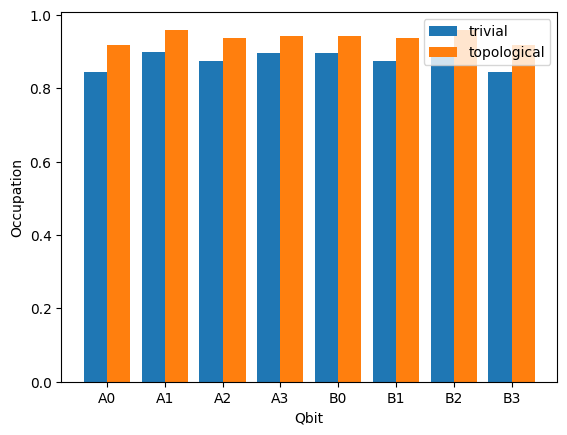

In [27]:
xs = np.arange(qbits_trivial.nqbits)
width = 0.4

plt.bar(xs - width * 0.5, occupations_trivial, width=width, label="trivial")
plt.bar(xs + width * 0.5, occupations_topological, width=width, label="topological")

plt.legend()
plt.xticks(xs, qbits_trivial.labels)
plt.xlabel("Qbit")
plt.ylabel("Occupation")
plt.show()